# California Housing Dataset: EDA

## Fetching Dataset

In [38]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/california-housing-prices


## Load Dataset

In [39]:
import pandas as pd
import os

# Find the CSV file in the dataset folder
file_path = os.path.join(path, 'housing.csv')
df = pd.read_csv(file_path)

# Preview
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Dataset Summary

In [40]:
# Info
df.info()

# Basic stats
df.describe(include='all')

# Missing values
print("Missing values:\n")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
Missing values:

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0


## Data Cleaning

In [50]:
if 'total_bedrooms' in df.columns:
    df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
else:
    print("❌ 'total_bedrooms' column not found!")

if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
else:
    print("ℹ️ 'ocean_proximity' column already one-hot encoded or not found.")


ℹ️ 'ocean_proximity' column already one-hot encoded or not found.


/tmp/ipython-input-50-1935050322.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


## Univariate Analysis

### Histogram of Target Variable

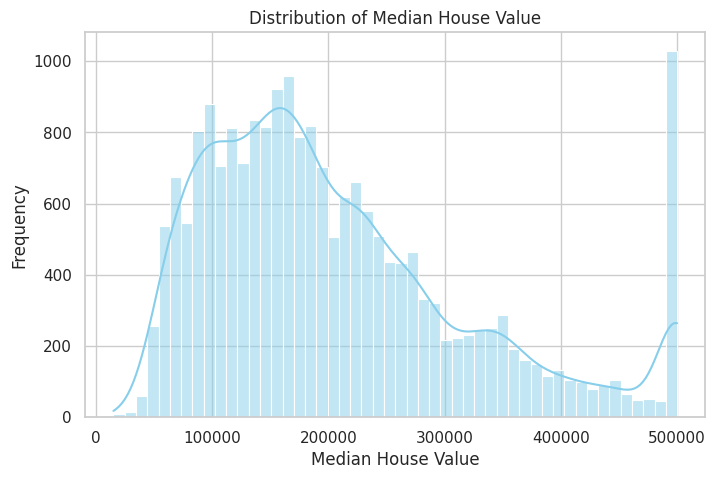

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(df['median_house_value'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


### Distribution of Median Income

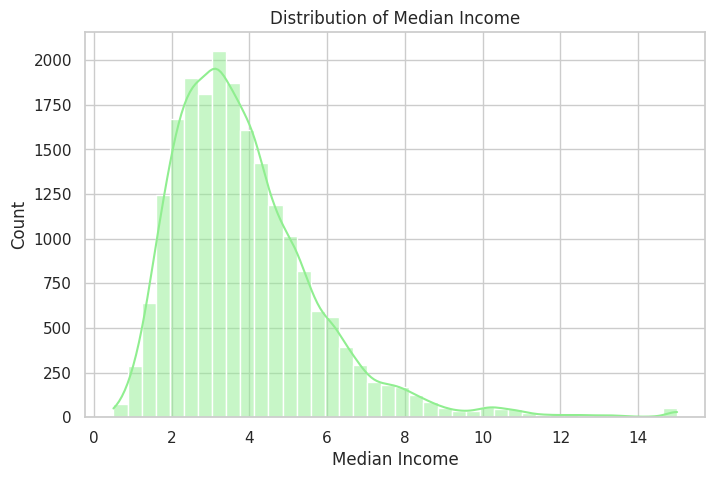

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(df['median_income'], bins=40, kde=True, color='lightgreen')
plt.title("Distribution of Median Income")
plt.xlabel("Median Income")
plt.ylabel("Count")
plt.show()



## Bivariate Relationships


### Correlation Heatmap

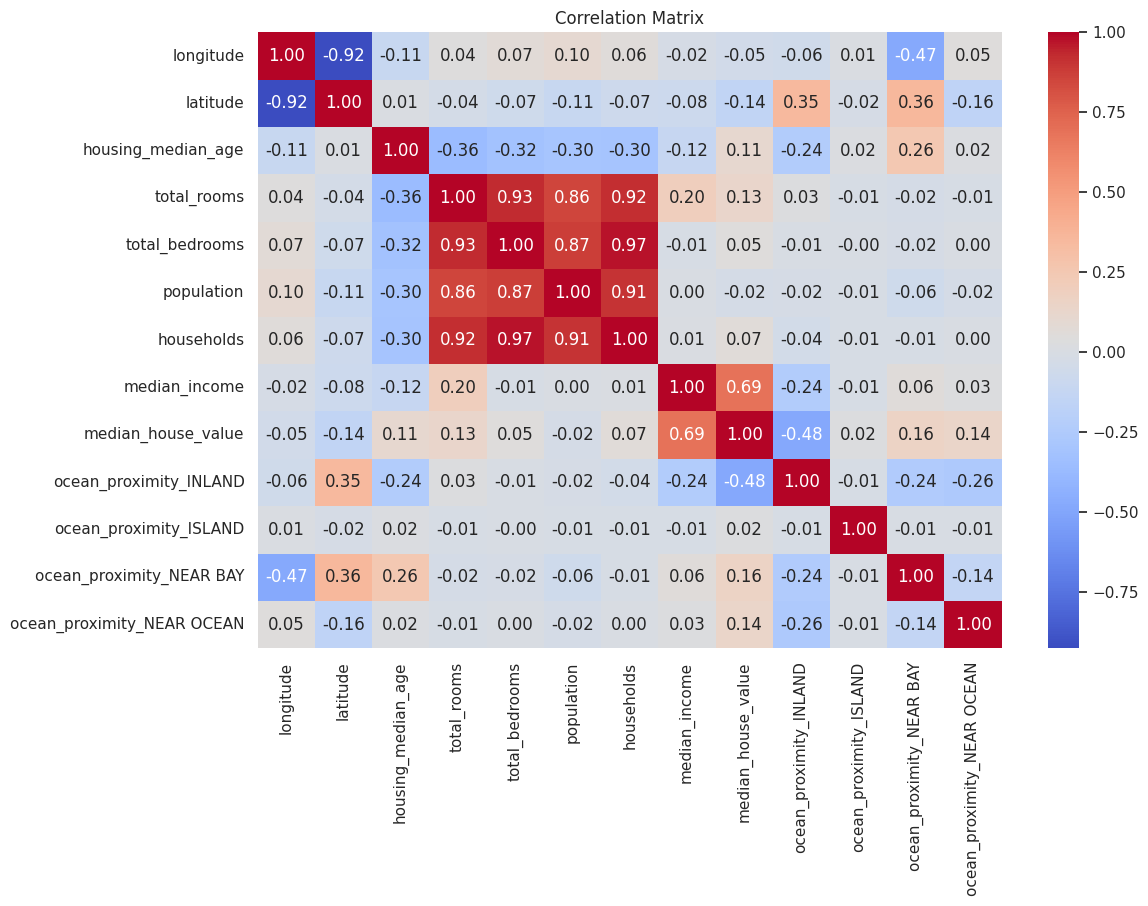

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Median Income vs. House Value

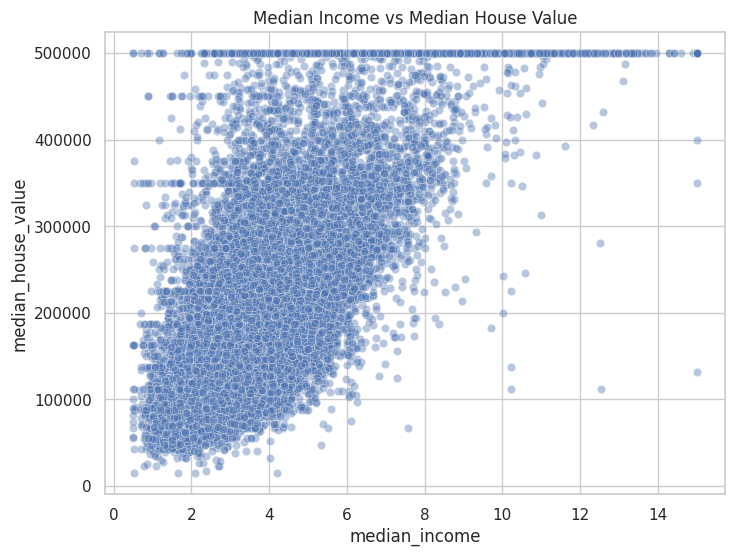

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.4)
plt.title("Median Income vs Median House Value")
plt.show()


## Geographic Distribution


### Latitude vs. Longitude Colored by House Value

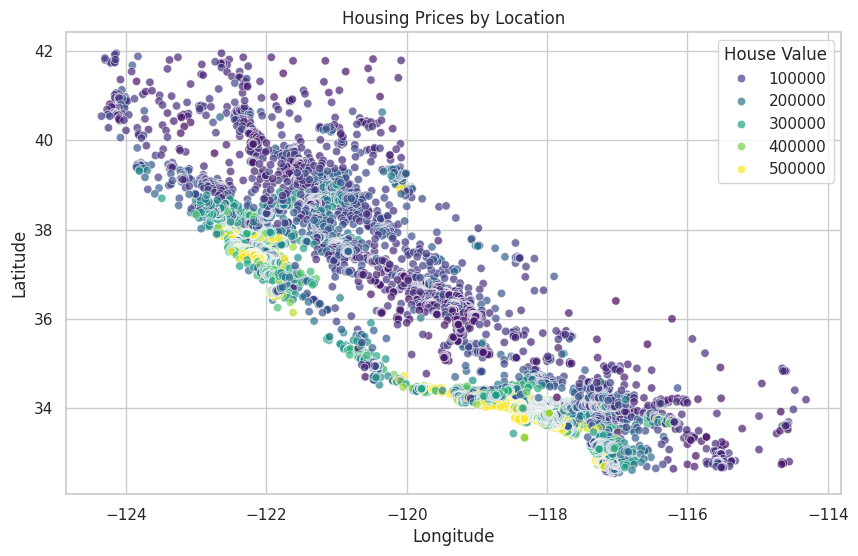

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', data=df,
                hue='median_house_value', palette='viridis', alpha=0.7)
plt.title("Housing Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="House Value", loc='upper right')
plt.show()


## Boxplots for Outliers

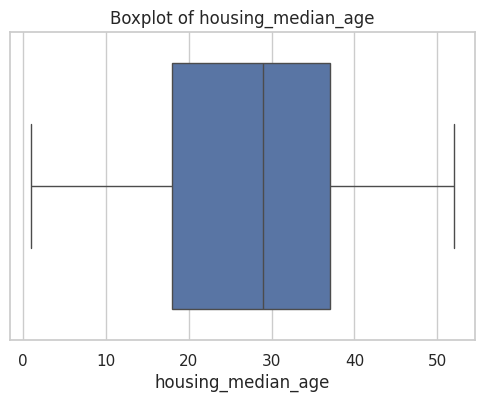

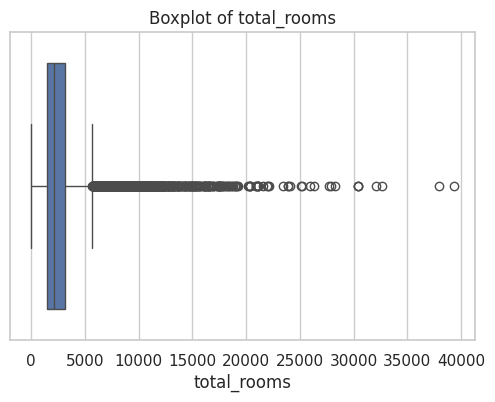

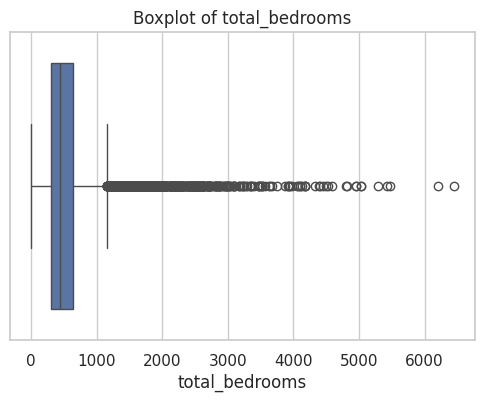

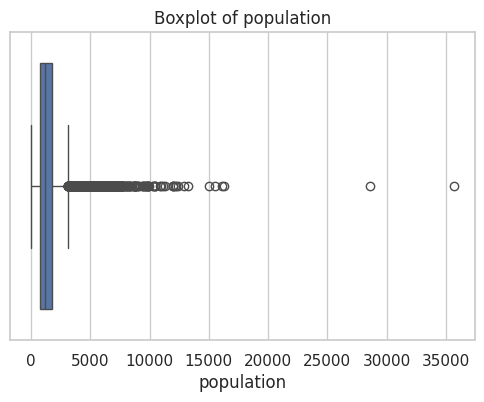

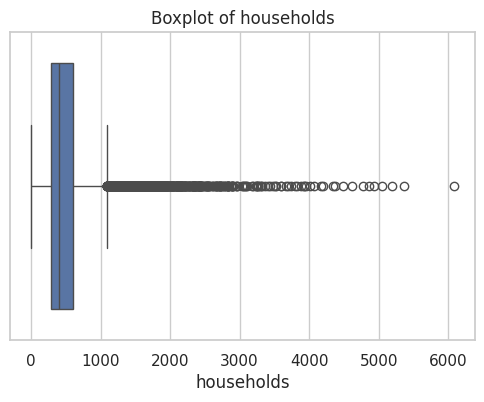

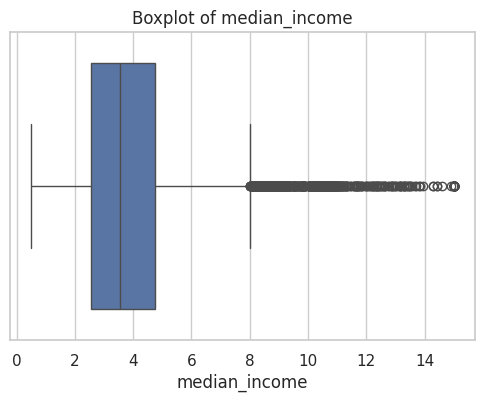

In [56]:
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


## Final Dataset Ready

In [57]:
print("Final shape:", df.shape)
print("Nulls remaining:", df.isnull().sum().sum())
df.head()


Final shape: (20640, 13)
Nulls remaining: 0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


# THANK YOU!